# Benchmarks
In this notebook we will cover some advanced configurations for Benchmark 
1. **Benchmark Creation**: Creating a Benchmark from scratch.
2. **Benchmark Evaluation**: Evaluating a collection of learners on a Benchmark.
3. **Benchmark Truncation**: Limiting how many interactions are used in a Benchmark.
4. **Benchmark Shuffling**: Repeating simulations to get a better estimate of performance.
5. **Benchmark Multiprocessing**: Controlling execution to manage resources and optimize runtime.
6. **Benchmark Restoration**: Saving results to file as a Benchmark evaluates so that work isn't loss to unexpected failures.

## Benchmark Creation
Before you do anything with a **Benchmark** you have to create one. To create a **Benchmark** all we need is a list of Simulations:

In [3]:
from coba.simulations import ValidationSimulation
from coba.benchmarks  import Benchmark

#this creates our benchmark. There are more options that can be passed here. These are discussed further down.
benchmark = Benchmark([ValidationSimulation()])

## Benchmark Evaluation
Once a **Benchmark** has been created the next step is to use it to evaluate some learners. This looks like this:

2021-06-25 20:32:58 Processing chunk...
2021-06-25 20:32:58   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:32:58   * Creating simulation 0 from source 0... (0.0 seconds)
2021-06-25 20:32:58   * Evaluating learner 1 on Simulation 0... (0.24 seconds)
2021-06-25 20:32:58   * Evaluating learner 0 on Simulation 0... (0.03 seconds)


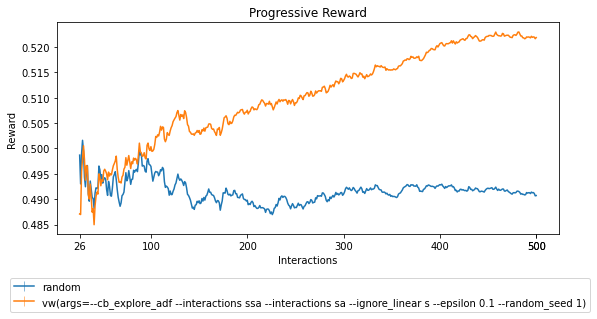

In [4]:
from coba.learners import RandomLearner, VowpalLearner
benchmark.evaluate([RandomLearner(),VowpalLearner()]).plot_learners()

## Benchmark Truncation

Perhaps the simplest and most useful setting when using a **Benchmark** is to fix the number of interactions. This can be done via the `take` parameter when creating a **Benchmark** as shown below. Notice that even though we create a simulation with 2000 interactions the plot only has 1000 due to `take=1000`.

2021-06-25 20:32:47 Processing chunk...
2021-06-25 20:32:47   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:32:47   * Creating simulation 0 from source 0... (0.0 seconds)
2021-06-25 20:32:47   * Evaluating learner 1 on Simulation 0... (0.1 seconds)
2021-06-25 20:32:47   * Evaluating learner 0 on Simulation 0... (0.02 seconds)


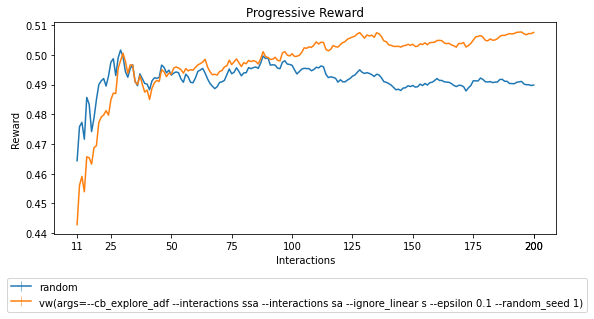

In [1]:
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

simulations = [ValidationSimulation()          ]
learners    = [RandomLearner(), VowpalLearner()]

Benchmark(simulations, take=200).evaluate(learners).plot_learners()

This can be particularly useful when creating a **Benchmark** from multiple simulations with different numbers of interactions.

2021-06-25 20:33:55 Processing chunk...
2021-06-25 20:33:55   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:33:55   * Creating simulation 0 from source 0... (0.0 seconds)
2021-06-25 20:33:56   * Evaluating learner 1 on Simulation 0... (0.46 seconds)
2021-06-25 20:33:56   * Evaluating learner 0 on Simulation 0... (0.05 seconds)
2021-06-25 20:33:56 Processing chunk...
2021-06-25 20:33:56   * Creating source 1 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:33:56   * Creating simulation 1 from source 1... (0.0 seconds)
2021-06-25 20:33:56   * Evaluating learner 1 on Simulation 1... (0.46 seconds)
2021-06-25 20:33:56   * Evaluating learner 0 on Simulation 1... (0.05 seconds)


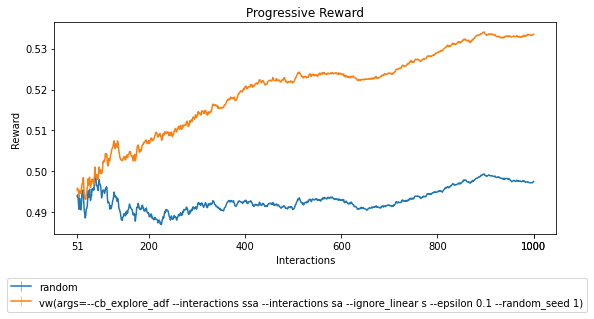

In [5]:
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

simulations = [ValidationSimulation(n_interactions=2000), ValidationSimulation(n_interactions=3000)]
learners    = [RandomLearner(), VowpalLearner()]

Benchmark(simulations, take=1000).evaluate(learners).plot_learners()

It can even be used as a way to filter out simulations which don't have enough interactions (look at the fourth line in the processing log).

2021-06-25 20:34:29 Processing chunk...
2021-06-25 20:34:29   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:34:29   * Creating simulation 0 from source 0... (0.0 seconds)
2021-06-25 20:34:29   * Simulation 0 has nothing to evaluate (likely due to `take` being larger than the simulation).
2021-06-25 20:34:29 Processing chunk...
2021-06-25 20:34:29   * Creating source 1 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:34:29   * Creating simulation 1 from source 1... (0.0 seconds)
2021-06-25 20:34:29   * Evaluating learner 1 on Simulation 1... (0.47 seconds)
2021-06-25 20:34:29   * Evaluating learner 0 on Simulation 1... (0.05 seconds)


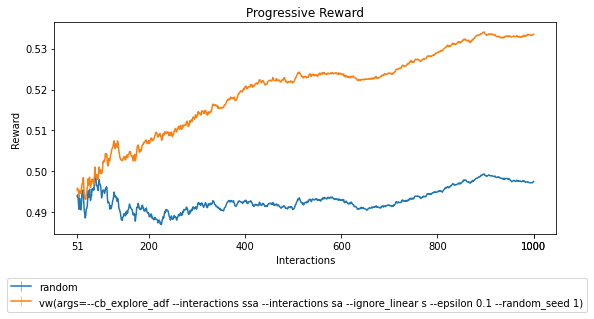

In [6]:
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

simulations = [ValidationSimulation(n_interactions=500), ValidationSimulation(n_interactions=3000)]
learners    = [RandomLearner(), VowpalLearner()]

Benchmark(simulations, take=1000).evaluate(learners).plot_learners()

This same procedure can be repeated for any dataset on Openml.org.

## Benchmark Shuffling

Another simple yet useful setting that can be used when defining a **Benchmark** is shuffling. Shuffling will cause **Benchmark** to evaluate learners against a simulation several times with interactions occurring in different orders each time. By default shuffling is applied to a simulations full sequence of interactions which means that when `take` is applied different interactions may be "taken".

To get a sense of this imagine we have a simulation with interactions A,B,C,D. If we were to shuffle twice and take 3 interactions we might end up with:

1. Simulation A,B,C,D -> Shuffle B,A,C,D -> Take(3) B,A,C -> Evaluate Learners
2. Simulation A,B,C,D -> Shuffle C,D,B,A -> Take(3) C,D,B -> Evaluate Learners

Utilizing this functionality is as simple as providing a list of integers to `shuffle` which will be used as seeds when shuffling to guarantee repeatability:


2021-06-25 20:34:45 Processing chunk...
2021-06-25 20:34:45   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:34:45   * Creating simulation 0 from source 0... (0.0 seconds)
2021-06-25 20:34:46   * Evaluating learner 1 on Simulation 0... (0.22 seconds)
2021-06-25 20:34:46   * Evaluating learner 0 on Simulation 0... (0.04 seconds)
2021-06-25 20:34:46   * Creating simulation 1 from source 0... (0.0 seconds)
2021-06-25 20:34:46   * Evaluating learner 1 on Simulation 1... (0.23 seconds)
2021-06-25 20:34:46   * Evaluating learner 0 on Simulation 1... (0.03 seconds)
2021-06-25 20:34:46   * Creating simulation 2 from source 0... (0.0 seconds)
2021-06-25 20:34:46   * Evaluating learner 1 on Simulation 2... (0.23 seconds)
2021-06-25 20:34:46   * Evaluating learner 0 on Simulation 2... (0.02 seconds)


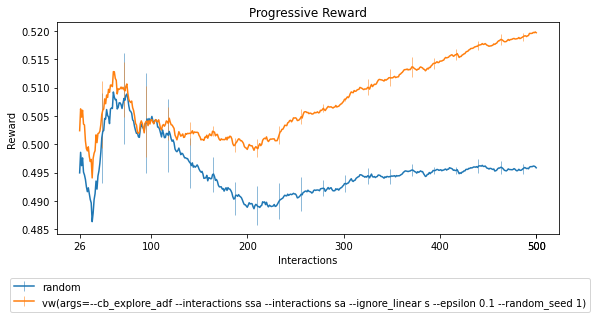

In [7]:
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

simulations = [ValidationSimulation()]
learners    = [RandomLearner(), VowpalLearner()]
seeds       = [1,2,3]

Benchmark(simulations, shuffle=seeds).evaluate(learners).plot_learners()

One advantage to shuffling is that it makes it possible to calculate and plot the standard deviations of performance across the shuffles as can be seen in the plot above. Shuffling also makes it possible create plots which visualize all the shuffles along with the mean performance and standard deviation.

2021-06-25 20:35:51 Processing chunk...
2021-06-25 20:35:51   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:35:51   * Creating simulation 0 from source 0... (0.0 seconds)
2021-06-25 20:35:51   * Evaluating learner 1 on Simulation 0... (0.24 seconds)
2021-06-25 20:35:51   * Evaluating learner 0 on Simulation 0... (0.02 seconds)
2021-06-25 20:35:51   * Creating simulation 1 from source 0... (0.0 seconds)
2021-06-25 20:35:52   * Evaluating learner 1 on Simulation 1... (0.23 seconds)
2021-06-25 20:35:52   * Evaluating learner 0 on Simulation 1... (0.03 seconds)
2021-06-25 20:35:52   * Creating simulation 2 from source 0... (0.0 seconds)
2021-06-25 20:35:52   * Evaluating learner 1 on Simulation 2... (0.24 seconds)
2021-06-25 20:35:52   * Evaluating learner 0 on Simulation 2... (0.03 seconds)


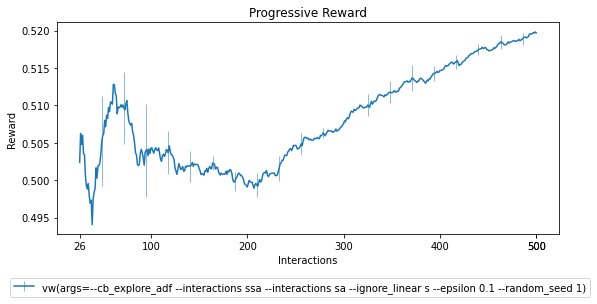

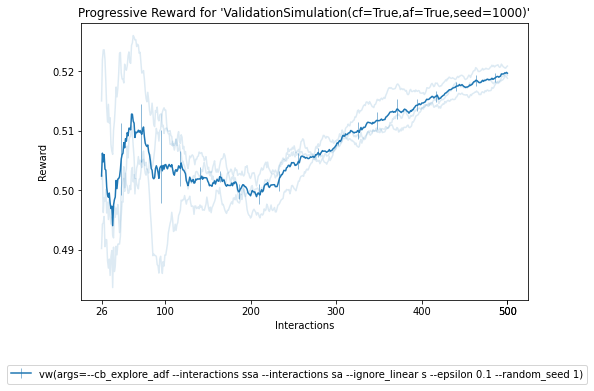

In [11]:
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

simulations = [ValidationSimulation()          ]
learners    = [RandomLearner(), VowpalLearner()]
seeds       = [1,2,3                           ]

result = Benchmark(simulations, shuffle=seeds).evaluate(learners)

result.plot_learners(learner_pattern="^vw.*")
result.plot_shuffles(learner_pattern="^vw.*")

## Benchmark Multiprocessing

The **Benchmark** comes with highly configurable multiprocessing functionality to support experiments that may contain many simulations or learners and can thereby take considerable time to complete. There are three parameters which control how **Benchmark** orchestrates tasks across process:
1. `processes` Determines how many processes to use when evaluating a benchmark.
2. `maxtasksperchild` Determines how many "tasks" processes should complete before being replaced with new processes
3. `chunk_by` Determines how tasks (i.e., simulation/learner pairs) are chunked when passed to processeses for evaluation

These parameters can be set either in a coba configuration file (more information about that in the configurations notebook). Or they can be set procedurally in code via **Benchmark** class setters: for example,  `Benchmark(simulations).processes(1).maxtasksperchild(1).chunk_by("source")`.

By default **Benchmark** multiprocessing settings are `processes=1, maxtasksperchild=1, chunk_by='source'`. This means that one process will be used and that the process will be torn down and restarted at the end of each task. Tearing down a process and restarting it protects against potential memory leaks in simulations and learners. Chunking by source means that all shuffles of a simulation will be handled by the same process as a single job.

(It may be worth mentioning that we have modified the default multiprocessor settings for these notebooks to avoid potential problems with certain examples and Jupyter Notebook multiprocessing weirdness. The default setting for these Jupyter Notebooks is `processes=1, maxtasksperchild=None, chunk_by='source'`)

We can actually see the chunking by looking at the output logs in the below Benchmark. Notice there are two "chunks", one for each simulation (which is called the source), and they happen one after the other (single processing), and that three simulations are made from each source chunk (one for each shuffle seed).

In [13]:
%%time
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

simulations = [ValidationSimulation(), ValidationSimulation()]
learners    = [RandomLearner(), VowpalLearner()              ]
seeds       = [1,2,3                                         ]

result = Benchmark(simulations, shuffle=seeds).evaluate(learners)

2021-06-25 20:37:00 Processing chunk...
2021-06-25 20:37:00   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:37:00   * Creating simulation 0 from source 0... (0.0 seconds)
2021-06-25 20:37:01   * Evaluating learner 1 on Simulation 0... (0.23 seconds)
2021-06-25 20:37:01   * Evaluating learner 0 on Simulation 0... (0.03 seconds)
2021-06-25 20:37:01   * Creating simulation 1 from source 0... (0.0 seconds)
2021-06-25 20:37:01   * Evaluating learner 1 on Simulation 1... (0.23 seconds)
2021-06-25 20:37:01   * Evaluating learner 0 on Simulation 1... (0.04 seconds)
2021-06-25 20:37:01   * Creating simulation 2 from source 0... (0.0 seconds)
2021-06-25 20:37:01   * Evaluating learner 1 on Simulation 2... (0.25 seconds)
2021-06-25 20:37:01   * Evaluating learner 0 on Simulation 2... (0.03 seconds)
2021-06-25 20:37:01 Processing chunk...
2021-06-25 20:37:01   * Creating source 1 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 

And below is an example of a Benchmark that processes both chunks in parallel. Notice that when multiple processesors are executing the logging output now contains which processor sent the message in addition to when the message was sent. Also notice the difference in execution time between the single process and multiprocess runs. 

In [14]:
%%time
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

simulations = [ValidationSimulation(), ValidationSimulation()]
learners    = [RandomLearner(), VowpalLearner()              ]
seeds       = [1,2,3                                         ]

result = Benchmark(simulations, shuffle=seeds).processes(2).evaluate(learners)

2021-06-25 20:37:05 -- SpawnPoolWorker-2 -- Processing chunk...
2021-06-25 20:37:05 -- SpawnPoolWorker-2 --   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:37:05 -- SpawnPoolWorker-2 --   * Creating simulation 0 from source 0... (0.0 seconds)
2021-06-25 20:37:05 -- SpawnPoolWorker-3 -- Processing chunk...
2021-06-25 20:37:05 -- SpawnPoolWorker-3 --   * Creating source 1 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:37:05 -- SpawnPoolWorker-3 --   * Creating simulation 3 from source 1... (0.0 seconds)
2021-06-25 20:37:05 -- SpawnPoolWorker-2 --   * Evaluating learner 1 on Simulation 0... (0.37 seconds)
2021-06-25 20:37:05 -- SpawnPoolWorker-3 --   * Evaluating learner 1 on Simulation 3... (0.38 seconds)
2021-06-25 20:37:05 -- SpawnPoolWorker-2 --   * Evaluating learner 0 on Simulation 0... (0.02 seconds)
2021-06-25 20:37:05 -- SpawnPoolWorker-2 --   * Creating simulation 1 from source 0... (0

Finally, if one wants to evaluate a Benchmark in full parallel `chunk_by` can be set to `'task'`. Which means each chunk will be a single task. This can drastically speed up evaluations when Learners are the processing bottleneck at the cost of increasing memory consumption and duplicating a little work due to simulations likely being duplicated in memory between processes.

In [15]:
%%time
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

simulations = [ValidationSimulation(), ValidationSimulation()]
learners    = [RandomLearner(), VowpalLearner()              ]
seeds       = [1,2,3                                         ]

result = Benchmark(simulations, shuffle=seeds).chunk_by('task').processes(2).evaluate(learners)

2021-06-25 20:37:29 -- SpawnPoolWorker-5 -- Processing chunk...
2021-06-25 20:37:29 -- SpawnPoolWorker-5 --   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:37:29 -- SpawnPoolWorker-5 --   * Creating simulation 0 from source 0... (0.0 seconds)
2021-06-25 20:37:29 -- SpawnPoolWorker-6 -- Processing chunk...
2021-06-25 20:37:29 -- SpawnPoolWorker-6 --   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:37:29 -- SpawnPoolWorker-6 --   * Creating simulation 0 from source 0... (0.0 seconds)
2021-06-25 20:37:29 -- SpawnPoolWorker-5 --   * Evaluating learner 0 on Simulation 0... (0.03 seconds)
2021-06-25 20:37:29 -- SpawnPoolWorker-5 -- Processing chunk...
2021-06-25 20:37:29 -- SpawnPoolWorker-5 --   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:37:29 -- SpawnPoolWorker-5 --   * Creating simulation 1 from source 0... (0.0 sec

## Benchmark Restoration

Benchmarks come with one final bit of functionality. If provided a file path Benchmarks will write their results as they run to file. In the case of something interrupting a **Benchmark** during evaluation (e.g., the internet going down or a computer being forced to restart) writing to file means that the **Benchmark** will be able to restart at its last point when the interruption happened. The **Benchmark** restoration file is also the format used to store the results for later processing so it is always a good idea to provide a file path if one wants to preserve the results. Here's what that looks like:

2021-06-25 20:38:58 Processing chunk...
2021-06-25 20:38:58   * Creating source 0 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 seconds)
2021-06-25 20:38:58   * Creating simulation 0 from source 0... (0.0 seconds)
2021-06-25 20:38:58   * Evaluating learner 1 on Simulation 0... (0.25 seconds)
2021-06-25 20:38:58   * Evaluating learner 0 on Simulation 0... (0.03 seconds)
2021-06-25 20:38:58   * Creating simulation 1 from source 0... (0.0 seconds)
2021-06-25 20:38:58   * Evaluating learner 1 on Simulation 1... (0.23 seconds)
2021-06-25 20:38:58   * Evaluating learner 0 on Simulation 1... (0.04 seconds)
2021-06-25 20:38:58   * Creating simulation 2 from source 0... (0.0 seconds)
2021-06-25 20:38:59   * Evaluating learner 1 on Simulation 2... (0.24 seconds)
2021-06-25 20:38:59   * Evaluating learner 0 on Simulation 2... (0.03 seconds)
2021-06-25 20:38:59 Processing chunk...
2021-06-25 20:38:59   * Creating source 1 from ValidationSimulation(cf=True,af=True,seed=1000)... (0.0 

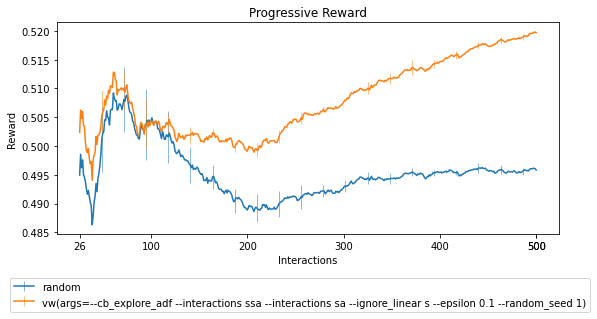

In [18]:
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

simulations = [ValidationSimulation(), ValidationSimulation()]
learners    = [RandomLearner(), VowpalLearner()              ]
seeds       = [1,2,3                                         ]

result = Benchmark(simulations, shuffle=seeds).evaluate(learners, 'example.log').plot_learners()

If you run the above code block two times the second time there will be no output and the plot will immediately show itself due to restoration.